<a href="https://colab.research.google.com/github/tomersk/python-applications/blob/main/04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 SCS Curve Number (CN) Method
The Soil Conservation Service devloped a simple method for computing abstrations from storm rainfall based on Curve Number. 
As per curve number method, excess precipitation or direct runoff is given by:

${P_e} = \frac{(P-I_a)^2}{P-I_a+S}$

where, $P$ = total rainfall, $I_a$ = initial abstraction, $S$ = potential maximum retention which is given as:

$S = \frac{1000}{CN}-10$

where $CN$ = Curve Number depending on LULC, soil type and antecedant moisture condition.


In [1]:
import numpy as np
def CN_Runoff(CN,P):
  S = 1000/CN - 10
  Pe = ((P-0.2*S)**2)/(P+0.8*S)
  print('Direct Runoff is = ',Pe,' in')
  return(Pe)

In [2]:
# Example
CN = 83.8
P = 5
Pe = CN_Runoff(CN,P)

Direct Runoff is =  3.251051711581748  in


Example: Storm rainfall occurred on a watershed as shown in the table below. The value of CN is 80 and Antecedent Moisture Condition II applies.
Calculate the cumulative abstractions and the excess rainfall hyetograph. (V.T. Chow, Ex. 5.5.4)

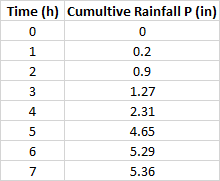



Solution. For $CN = 80$, $S = (1000/80) - 10 = 2.50$ in; $I_a = 0.2\times S = 0.5$ in. The
initial abstraction absorbs all of the rainfall up to $P = 0.5$ in. This includes the 0.2
in of rainfall occurring during the first hour and 0.3 in of the rain falling during
the second hour. For $P > 0.5$ in, the continuing abstraction Fa is computed as follows,

$F_a=\frac{S(P-I_a)}{P-I_a+S}$


[0, 0, 0.05517241379310345, 0.18131498470948015, 0.7601160092807426, 2.5898496240601507, 3.1473388203017834, 3.2091847826086957]
[0, 0, 0.05517241379310345, 0.1261425709163767, 0.5788010245712625, 1.829733614779408, 0.5574891962416326, 0.061845962306912305]


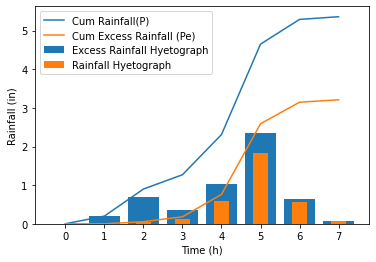

In [13]:
import numpy as np
import matplotlib.pyplot as plt
CN=80
time=np.arange(0,8)
#print (time)
P = [None] * len(time)
P = [0, 0.20, 0.90, 1.27, 2.31, 4.65, 5.29, 5.36]
#print (P)
Ia = [None] * len(time)
Fa = [None] * len(time)
Pe = [None] * len(time)
pe = [None] * len(time)
p = [None] * len(time)
pe[0]=0
p[0]=0
S=(1000/CN)-10
Ia[0]=0.2*S
Fa[0]=0
Pe[0]=0
for i in time[1:]: 
  Ia[i]=0.2*S 
  if P[i]< Ia[i]:
    Ia[i]=P[i]
    Fa[i]=0 
    Pe[i]=0
  else:
    Fa[i]= (S*(P[i]-Ia[i]))/(P[i]-Ia[i]+S)
    Pe[i]=P[i]-Ia[i]-Fa[i]
  
  pe[i]= Pe[i]-Pe[i-1]
  p[i] = P[i] - P[i-1]
print (Pe)
print (pe)
plt.plot(time, P)
plt.plot(time,Pe) 
plt.bar(time,p,width=0.8)
plt.bar(time,pe,width=0.4)

plt.xlabel('Time (h)')
plt.ylabel('Rainfall (in)')
plt.legend(['Cum Rainfall(P)','Cum Excess Rainfall (Pe)','Rainfall Hyetograph','Excess Rainfall Hyetograph'])

Constant Rainfall Case:

[0, 0, 0.03214285714285714, 0.15312499999999996, 0.33611111111111125, 0.5625, 0.8204545454545455, 1.102083333333333]
[0, 0, 0.03214285714285714, 0.12098214285714282, 0.1829861111111113, 0.22638888888888875, 0.25795454545454555, 0.28162878787878753]


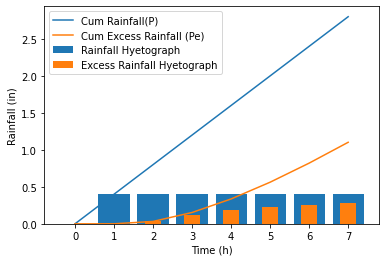

In [14]:
import numpy as np
import matplotlib.pyplot as plt
CN=80
time=np.arange(0,8)
#print (time)
P = [None] * len(time)
P = [0, 0.4, 0.8, 1.2, 1.6, 2, 2.4, 2.8]
#print (P)
Ia = [None] * len(time)
Fa = [None] * len(time)
Pe = [None] * len(time)
pe = [None] * len(time)
p = [None] * len(time)
pe[0]=0
p[0]=0
S=(1000/CN)-10
Ia[0]=0.2*S
Fa[0]=0
Pe[0]=0
for i in time[1:]: 
  Ia[i]=0.2*S 
  if P[i]< Ia[i]:
    Ia[i]=P[i]
    Fa[i]=0 
    Pe[i]=0
  else:
    Fa[i]= (S*(P[i]-Ia[i]))/(P[i]-Ia[i]+S)
    Pe[i]=P[i]-Ia[i]-Fa[i]
  
  pe[i]= Pe[i]-Pe[i-1]
  p[i] = P[i] - P[i-1]
print (Pe)
print (pe)
plt.plot(time, P)
plt.plot(time,Pe) 
plt.bar(time,p,width=0.8)
plt.bar(time,pe,width=0.4)

plt.xlabel('Time (h)')
plt.ylabel('Rainfall (in)')
plt.legend(['Cum Rainfall(P)','Cum Excess Rainfall (Pe)','Rainfall Hyetograph','Excess Rainfall Hyetograph'])